 ### Box_fox  transeform  xi^l=xi^l-1/l if l!=0  , ln(xi) if l=0
 

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer




In [34]:
df=pd.read_csv('concrete_data.csv')

In [35]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [36]:
df.shape

(1030, 9)

In [37]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [38]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [39]:
x=df.drop(columns=['Strength'])
y=df[['Strength']]

In [40]:
x

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
y_train

,Strength
995,27.68
507,62.05
334,23.80
848,33.40
294,7.40
...,...
87,24.40
330,42.22
466,33.56
121,68.30


In [42]:
!pip install --upgrade scipy

Defaulting to user installation because normal site-packages is not writeable


In [43]:
import scipy.stats as stats

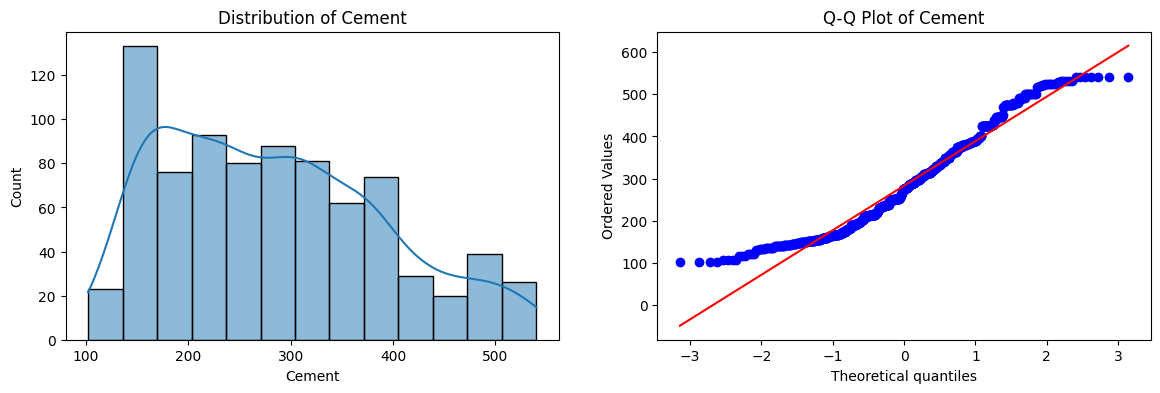

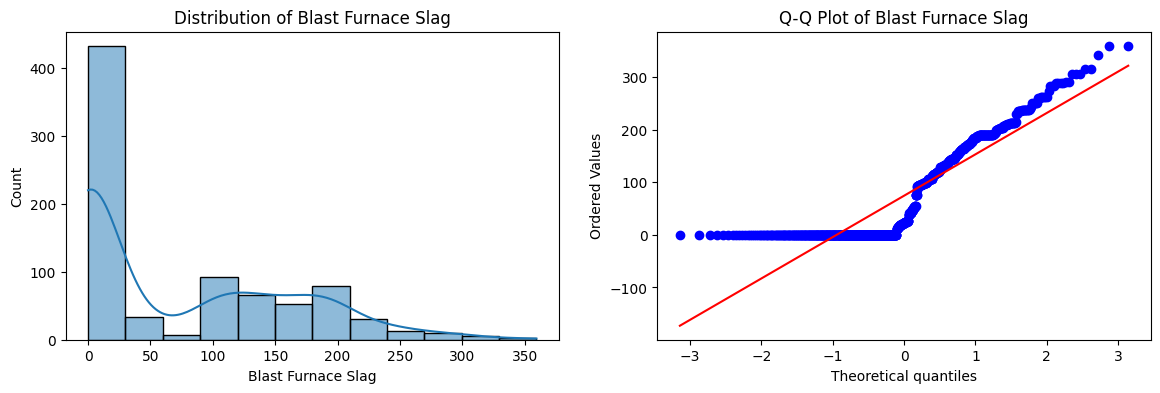

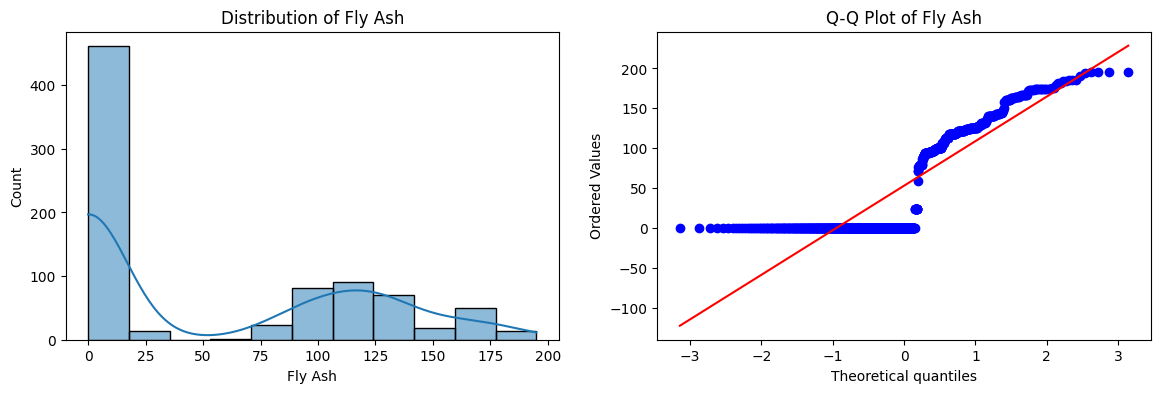

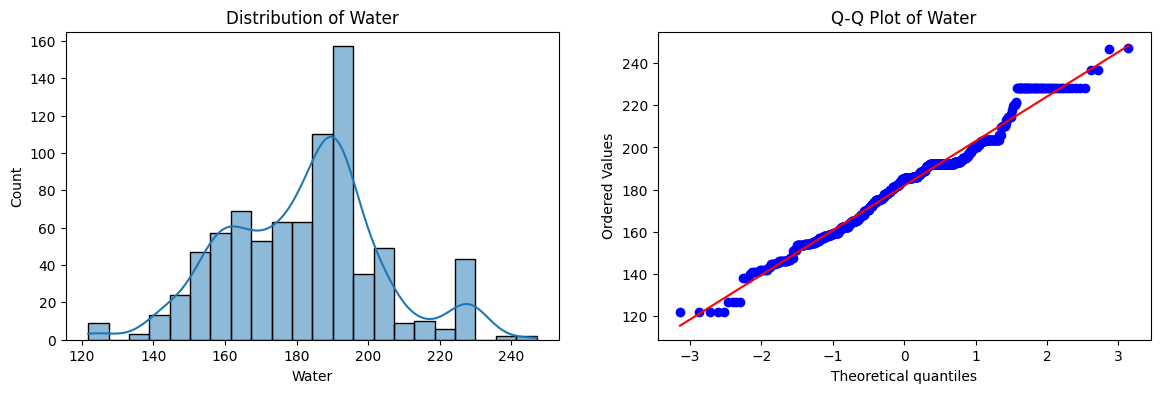

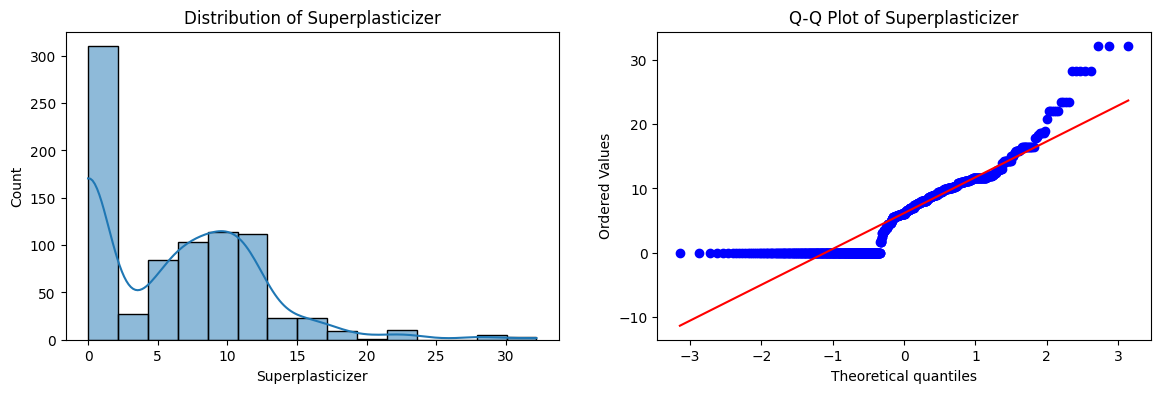

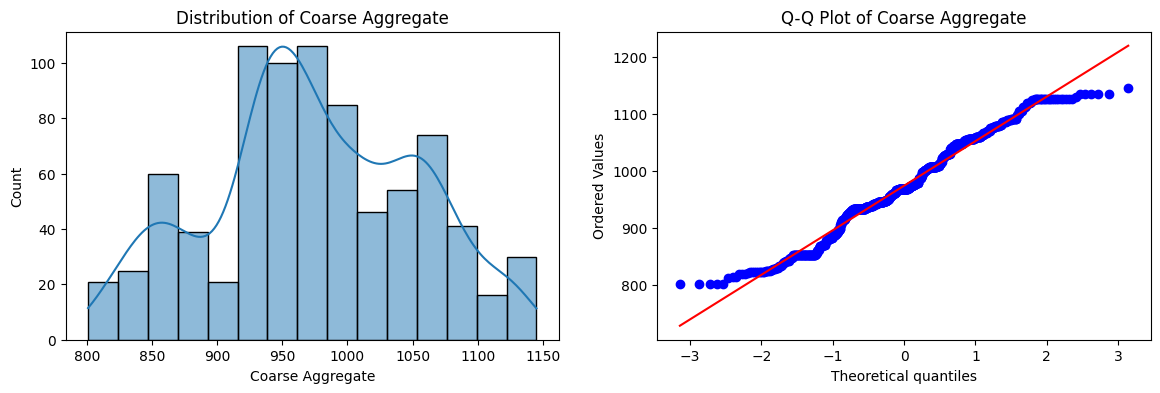

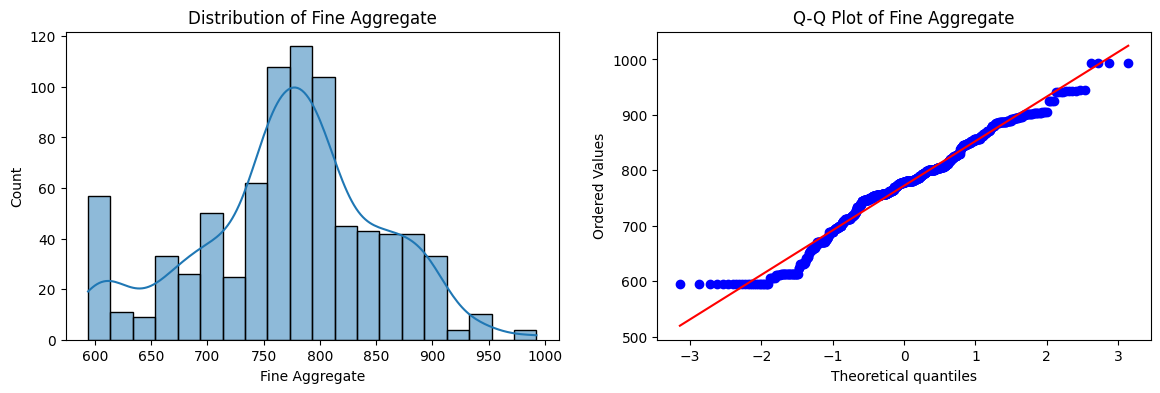

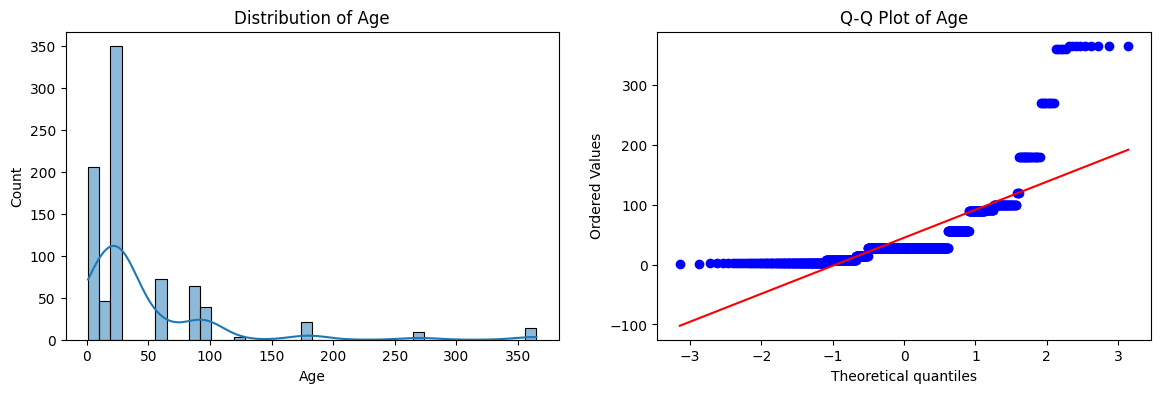

In [44]:
for col in x_train.columns:
    plt.figure(figsize=(14, 4))

    # First subplot - Distribution plot
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)  # Use histplot instead of displot
    plt.title(f'Distribution of {col}')

    # Second subplot - Q-Q plot
    plt.subplot(122)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

    plt.show()
    


In [52]:
# apply boc-cox Tranceform 
pt=PowerTransformer(method='box-cox')
x_train_t=pt.fit_transform(x_train+0.0000001)
x_test_t=pt.fit_transform(x_test+0.000001)
pd.DataFrame({ 'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_})



,cols,box_cox_lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.025996
2,Fly Ash,-0.006544
3,Water,0.959062
4,Superplasticizer,0.103365
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [53]:
lr=LinearRegression()
lr.fit(x_train_t,y_train)
y_pred2=lr.predict(x_test_t)
r2_score(y_test,y_pred2)


0.8051049041713468

In [54]:
x_train_t

array([[-1.27975148,  0.952465  ,  1.12792184, ..., -0.26250009,
        -0.67756847,  0.10600969],
       [ 1.24470596,  0.72494984,  1.13640769, ..., -1.91272789,
        -0.3140622 ,  0.10600969],
       [ 0.07984236, -1.08630996,  1.13091439, ...,  1.01840672,
         0.02595743, -1.67597002],
       ...,
       [-0.84451727, -1.08630996,  1.13293882, ...,  1.34536666,
         0.29715693,  1.24673335],
       [ 1.5656235 ,  0.92507694, -0.88724442, ..., -1.53725479,
         0.0762111 ,  0.10600969],
       [ 0.42655631, -1.08630996,  1.12619639, ..., -0.62083415,
         0.09510819,  0.10600969]])

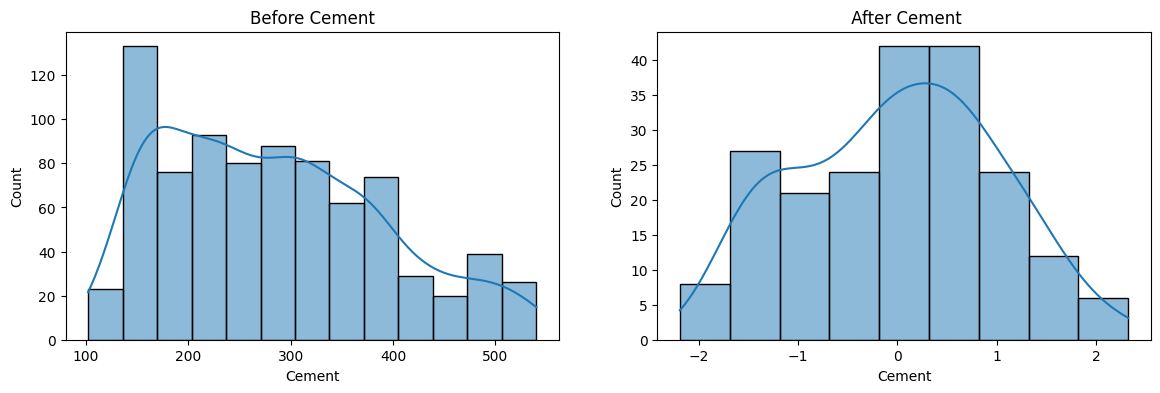

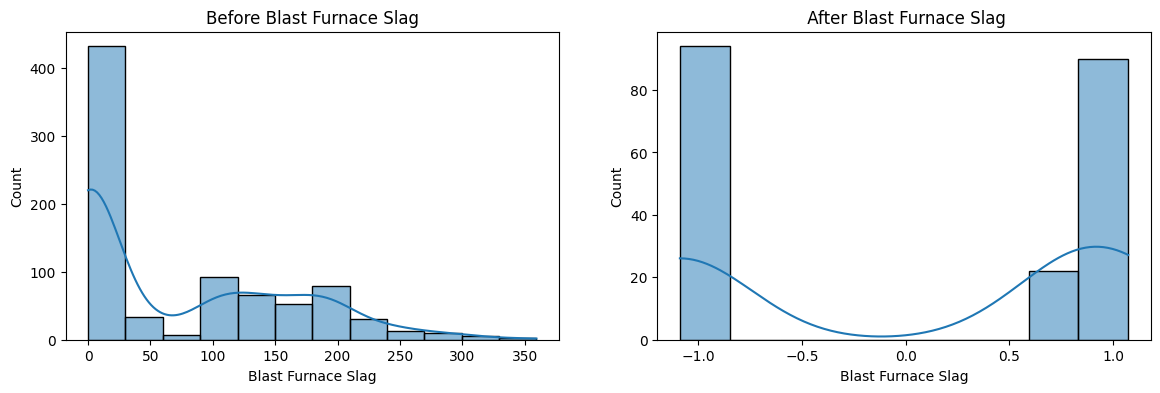

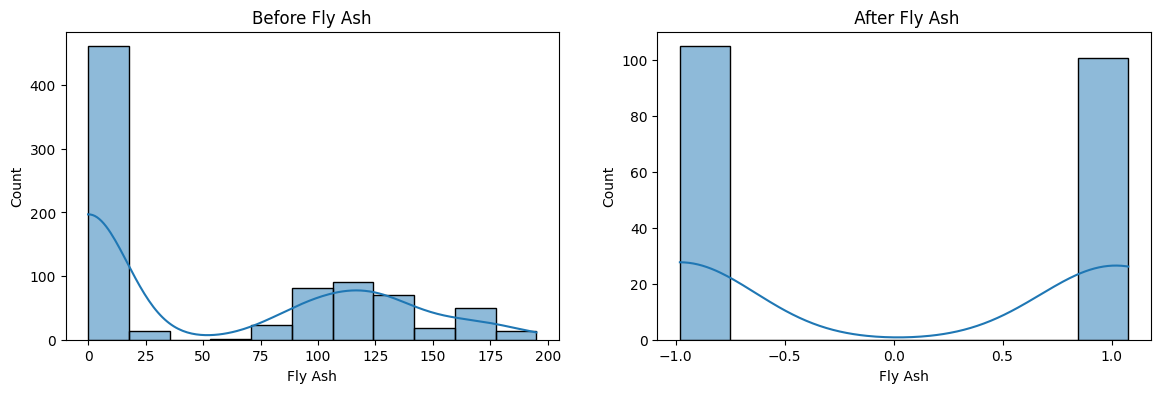

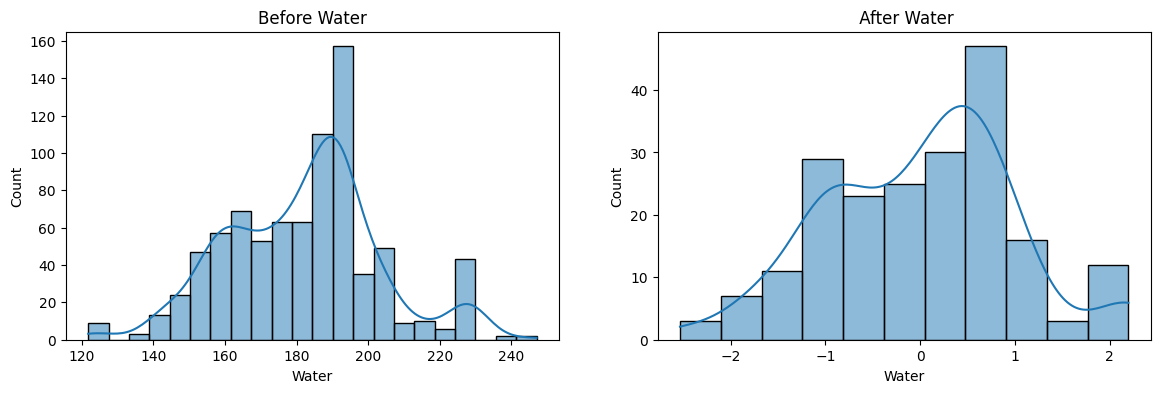

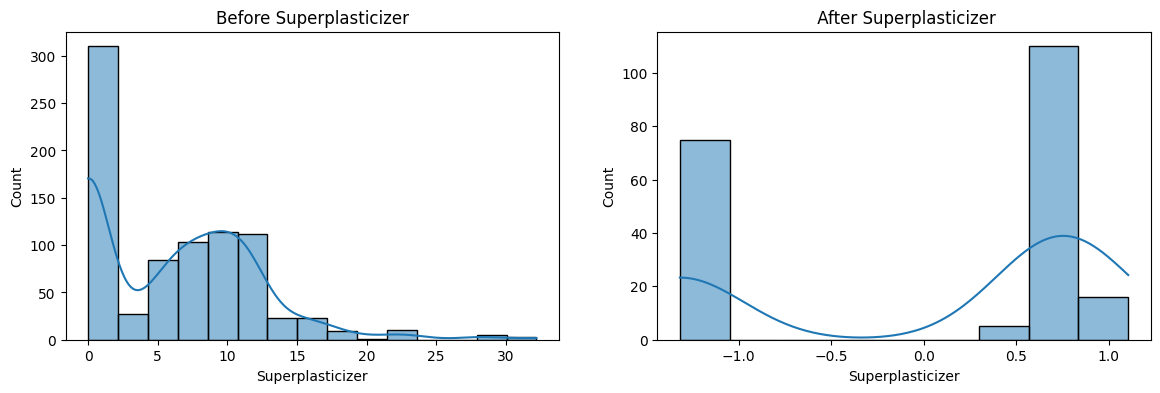

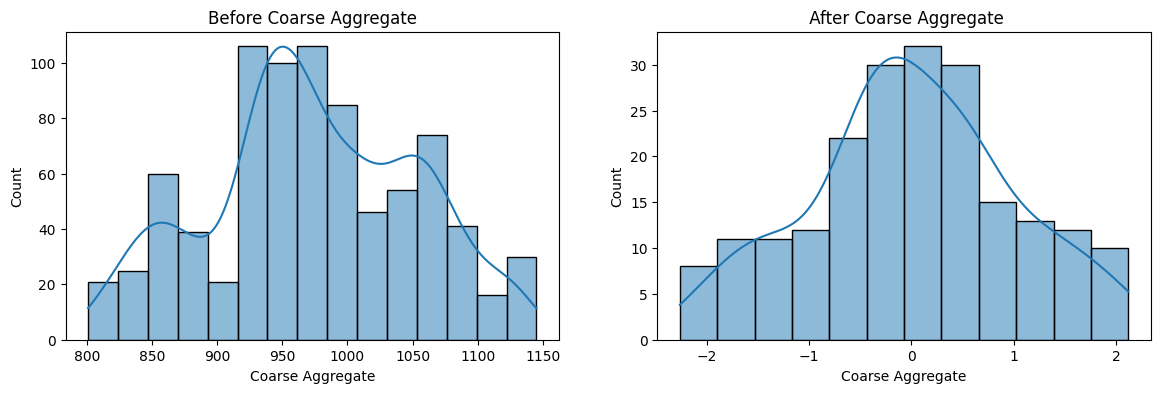

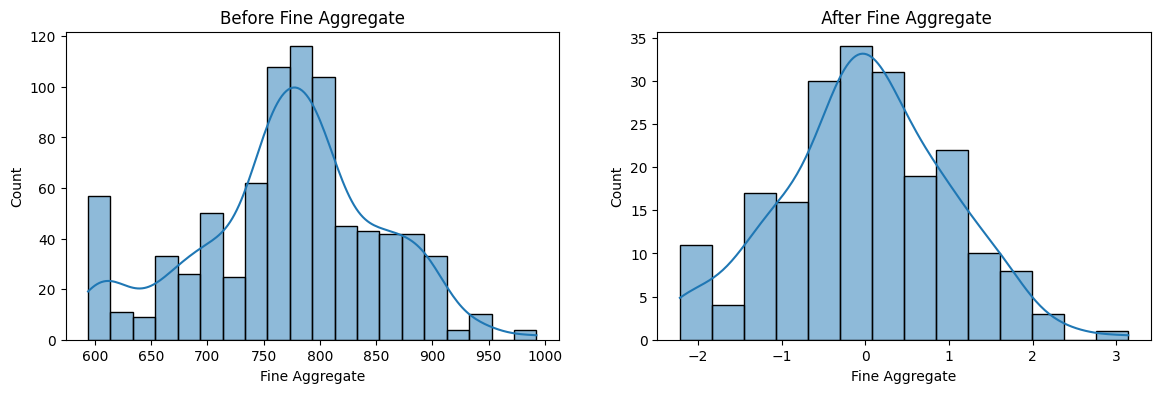

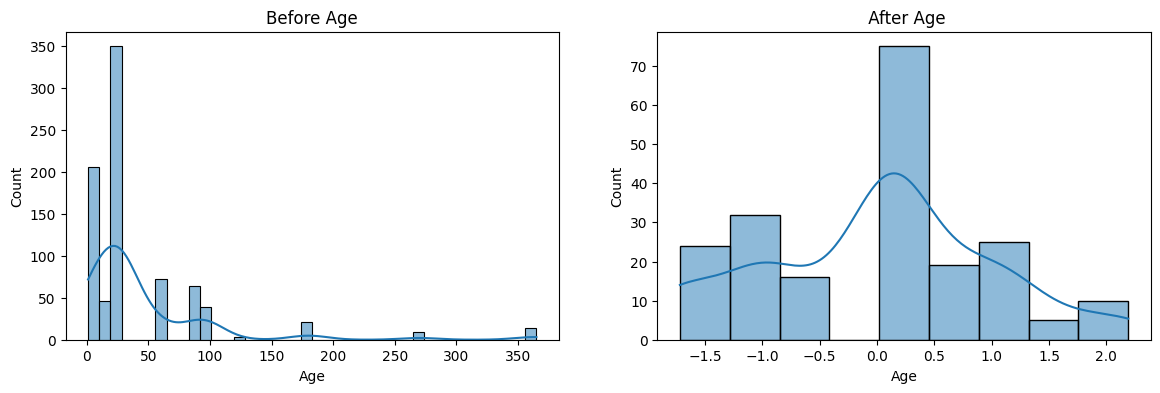

In [56]:
x_train_t2=pd.DataFrame(x_test_t,columns=x_train.columns)
for col in x_train.columns:
    plt.figure(figsize=(14, 4))

    # First subplot - Distribution plot
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)  # Use histplot instead of displot
    plt.title(f'Before {col}')

    # Second subplot - Q-Q plot
    plt.subplot(122)
    sns.histplot(x_train_t2[col], kde=True)
    plt.title(f' After {col}')

    plt.show()

In [57]:
pt=PowerTransformer()
x_train_ty=pt.fit_transform(x_train)
x_test_ty=pt.fit_transform(x_test)
pd.DataFrame({ 'cols':x_train.columns,'y_jon_lambdas':pt.lambdas_})

,cols,y_jon_lambdas
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


In [58]:
lr=LinearRegression()
lr.fit(x_train_ty,y_train)
y_pred3=lr.predict(x_test_ty)
print(r2_score(y_test,y_pred3))

0.8153845514592458
